# Pymaceuticals Inc.
---

### Analysis

1.Outliers: Of the four selected treatments, Infunibol had one outlier. Overal the data is very reliable.
2. Line graph: For mouse l509 the Capomulin treatment started to be effective on day 20.
3. Correlation/Regression: There is a strong positive correlation (.84) between the average weight(g) and average tumor volume (mm3).
 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID")
#format
mouse_study["Tumor Volume (mm3)"] = mouse_study["Tumor Volume (mm3)"].map("{:.1f}".format)
#convert dtypes
columns_to_convert = {
    "Weight (g)": float,
    "Tumor Volume (mm3)": float
}
MS = mouse_study.astype(columns_to_convert)
# Display the data table for preview
MS.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22.0
1,b128,5,45.7,0,Capomulin,Female,9,22.0
2,b128,10,43.3,0,Capomulin,Female,9,22.0
3,b128,15,43.8,0,Capomulin,Female,9,22.0
4,b128,20,42.7,0,Capomulin,Female,9,22.0


In [2]:
# Checking the number of mice.
len(MS["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = MS[MS.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.0,0,Propriva,Female,21,26.0
861,g989,0,45.0,0,Propriva,Female,21,26.0
862,g989,5,48.8,0,Propriva,Female,21,26.0
863,g989,5,47.6,0,Propriva,Female,21,26.0
864,g989,10,51.7,0,Propriva,Female,21,26.0
865,g989,10,49.9,0,Propriva,Female,21,26.0
866,g989,15,51.3,1,Propriva,Female,21,26.0
867,g989,15,53.4,0,Propriva,Female,21,26.0
868,g989,20,55.3,1,Propriva,Female,21,26.0
869,g989,20,54.7,1,Propriva,Female,21,26.0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_MS = MS.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first", inplace=False, ignore_index=False)
clean_MS.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22.0
1,b128,5,45.7,0,Capomulin,Female,9,22.0
2,b128,10,43.3,0,Capomulin,Female,9,22.0
3,b128,15,43.8,0,Capomulin,Female,9,22.0
4,b128,20,42.7,0,Capomulin,Female,9,22.0


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_MS["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#clean_MS["Tumor Volume (mm3)"] = clean_MS["Tumor Volume (mm3)"].astype(float)

mean = clean_MS.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_MS.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_MS.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = clean_MS.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = clean_MS.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": stdev,
    "Tumor Volume Std. Err.": SEM
})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.392949,50.95,43.175240,6.570787,0.526084
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_df = clean_MS.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
stat_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.392949,50.95,43.175240,6.570787,0.526084
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


## Bar and Pie Charts

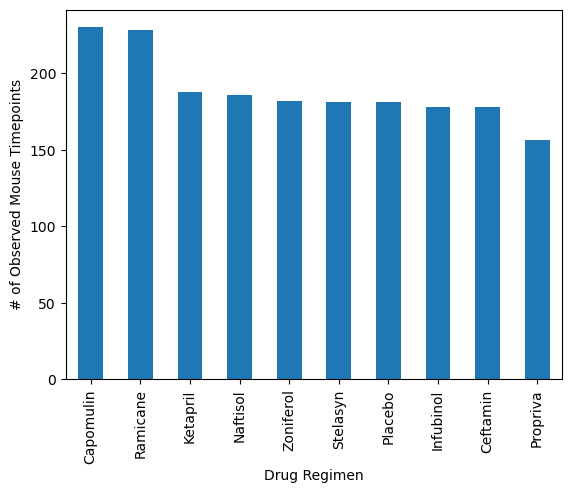

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_observed = clean_MS["Drug Regimen"].value_counts()
num_observed.plot(kind = 'bar')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

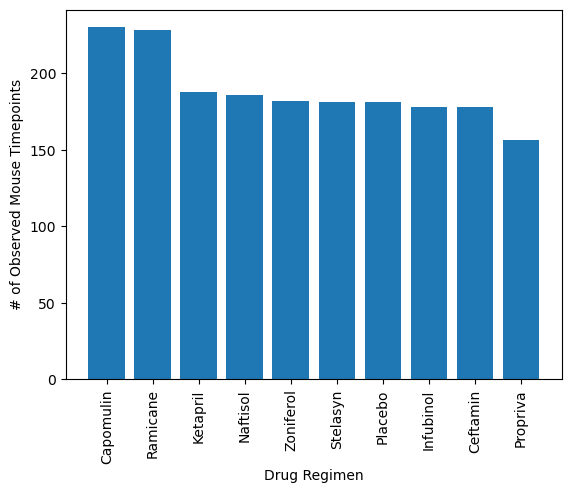

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(num_observed.index, num_observed.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

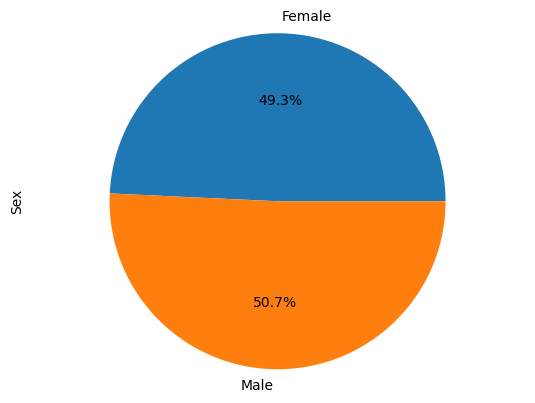

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_MS.groupby("Sex")["Sex"].count()
sex.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.show()

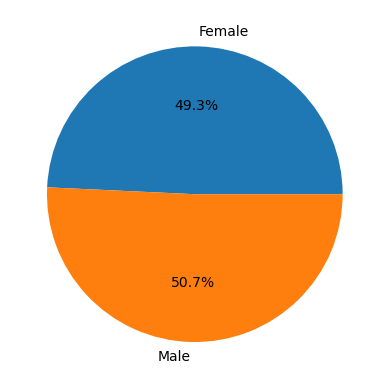

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex.index
value = sex.values

plt.pie(value, labels = labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_drug = clean_MS.groupby(["Mouse ID"])['Timepoint'].max()
grouped_drug =grouped_drug.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = grouped_drug.merge(clean_MS, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_vol


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,68.0,2,Infubinol,Female,20,23.0
1,a251,45,65.5,1,Infubinol,Female,21,25.0
2,a262,45,70.7,4,Placebo,Female,17,29.0
3,a275,45,63.0,3,Ceftamin,Female,20,28.0
4,a366,30,63.4,1,Stelasyn,Female,16,29.0
...,...,...,...,...,...,...,...,...
244,z435,10,48.7,0,Propriva,Female,12,26.0
245,z578,45,30.6,0,Ramicane,Male,11,16.0
246,z581,45,62.8,3,Infubinol,Female,24,25.0
247,z795,45,65.7,3,Naftisol,Female,13,29.0


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [] # for loop
tumor_vol_plot = [] # to append 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in treatments:
    #filter df for specific drug and tumor vol
    drug_df = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq, 2)

    tumor_vol = list(drug_df)

    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    #outliers
    outlier = drug_df.loc[(tumor_vol < lower_bound) | (tumor_vol> upper_bound)]
    
    tumor_vol_plot.append(tumor_vol)
    print(f"{x} potential outlier = {outlier}.")

Capomulin potential outlier = Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane potential outlier = Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol potential outlier = 31    36.3
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin potential outlier = Series([], Name: Tumor Volume (mm3), dtype: float64).


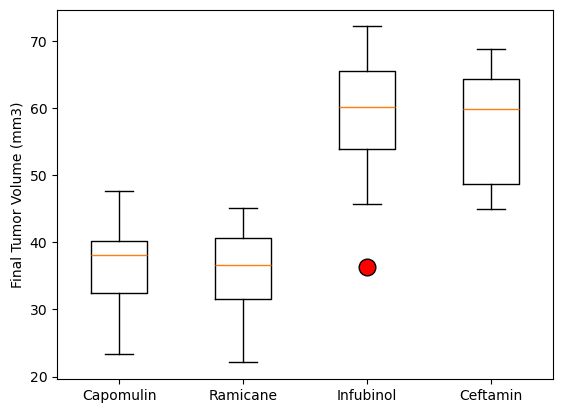

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
flierprops = dict(marker= "o", markerfacecolor= "red", markeredgecolor= "black", markersize= "12")
ax1.boxplot(tumor_vol_plot, flierprops=flierprops)
ax1.set_ylabel('Final Tumor Volume (mm3)')
x_axis = np.arange(1, len(treatments)+1)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(tick_locations, treatments)
plt.show()

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

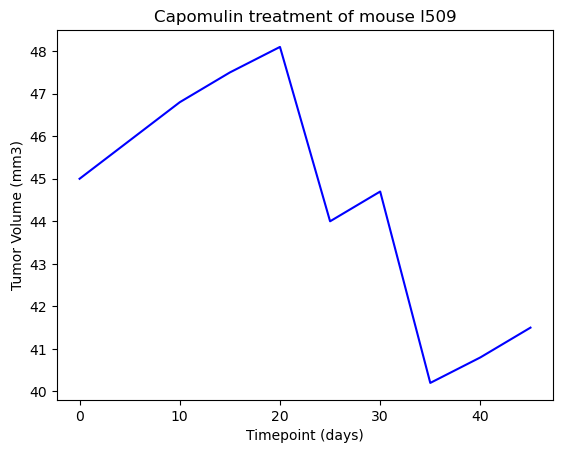

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Cap_vol_time = clean_MS.loc[(clean_MS["Drug Regimen"] == "Capomulin") & (clean_MS["Mouse ID"] == "l509"), :]
Cap_vol_time.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line", color="blue", \
                  xlabel = "Timepoint (days)", ylabel = "Tumor Volume (mm3)", title = "Capomulin treatment of mouse l509", legend= None)


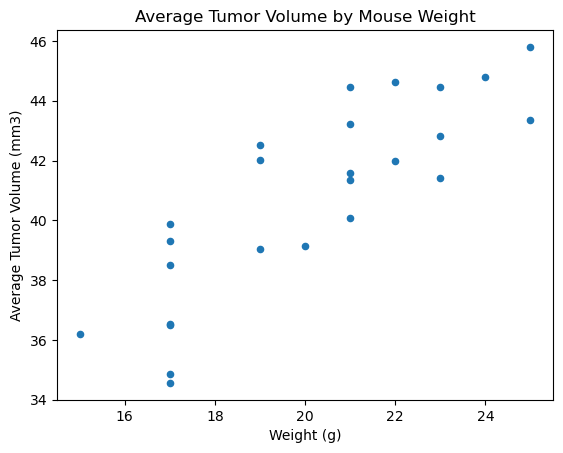

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Cap_WT= clean_MS.loc[clean_MS["Drug Regimen"]== "Capomulin"]
grouped_df=Cap_WT.groupby(["Mouse ID", "Weight (g)"])
scatter_series = grouped_df["Tumor Volume (mm3)"].mean()

scatter_df = scatter_series.reset_index()

scatter_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.xlabel("Weight (g)")  
plt.ylabel("Average Tumor Volume (mm3)") 
plt.title("Average Tumor Volume by Mouse Weight") 
plt.show()

## Correlation and Regression

The correlation between mouse weight(g) and average tumor volume (mm3) is 0.84.


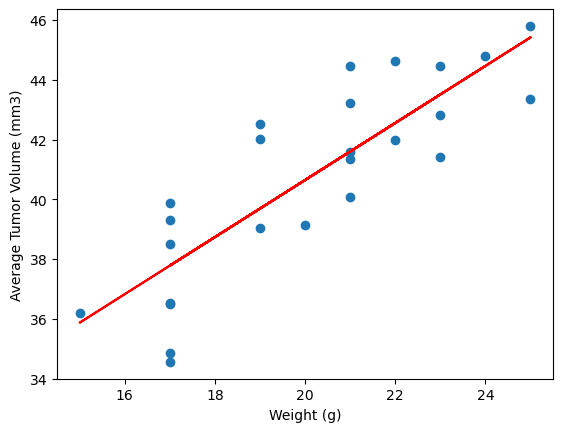

In [33]:
# Calculate the correlation coefficient and a linear regression model 
cap_x = scatter_df["Weight (g)"]
cap_y = scatter_df["Tumor Volume (mm3)"]

correlation_coeff = st.pearsonr(cap_x, cap_y)
print(f"The correlation between mouse weight(g) and average tumor volume (mm3) is {round(correlation_coeff[0],2)}.")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_val = scatter_df["Weight (g)"]
y_val = scatter_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()